# Generate (pseudo) dataset with calibrated files that are equal sized

In [ ]:
import cv2, os
from matplotlib import pyplot as plt
from models.dataset.dataset_interface import save_dataset

cal_dir = "../../resources/images/calibrated"
uncal_dir = "../../resources/images/uncalibrated"
zivid_dir = "zivid"
realsense_dir = "realsense"
color_dir = "color"
depth_dir = "depth"
dataset_file = os.path.join(cal_dir, "pseudo_calibrated_images.npz")

realsense_color_images = []
realsense_depth_images = []
zivid_color_images = []
zivid_depth_images = []
for i in range(33):
    filename = str(i) + ".png"

    # input paths
    urc_path = os.path.join(uncal_dir, realsense_dir, color_dir, filename)
    urd_path = os.path.join(uncal_dir, realsense_dir, depth_dir, filename)
    uzc_path = os.path.join(uncal_dir, zivid_dir, color_dir, filename)
    uzd_path = os.path.join(uncal_dir, zivid_dir, depth_dir, filename)

    # read images
    rc = cv2.imread(urc_path)
    rd = cv2.imread(urd_path, cv2.IMREAD_GRAYSCALE)
    zc = cv2.imread(uzc_path)
    zd = cv2.imread(uzd_path, cv2.IMREAD_GRAYSCALE)

    if rc is None or rd is None or zc is None or zd is None:
        continue

    # resize realsense images
    rc = cv2.resize(src=rc, dsize=(zc.shape[1], zc.shape[0]))
    rd = cv2.resize(src=rd, dsize=(zd.shape[1], zd.shape[0]))

    # write resized images
    realsense_color_images.append(rc)
    realsense_depth_images.append(rd)
    zivid_color_images.append(zc)
    zivid_depth_images.append(zd)

save_dataset(
    realsense_color_images,
    realsense_depth_images,
    zivid_color_images, 
    zivid_depth_images,
    dataset_file, 
)

# Open Dataset and visualize images

<Figure size 432x288 with 0 Axes>

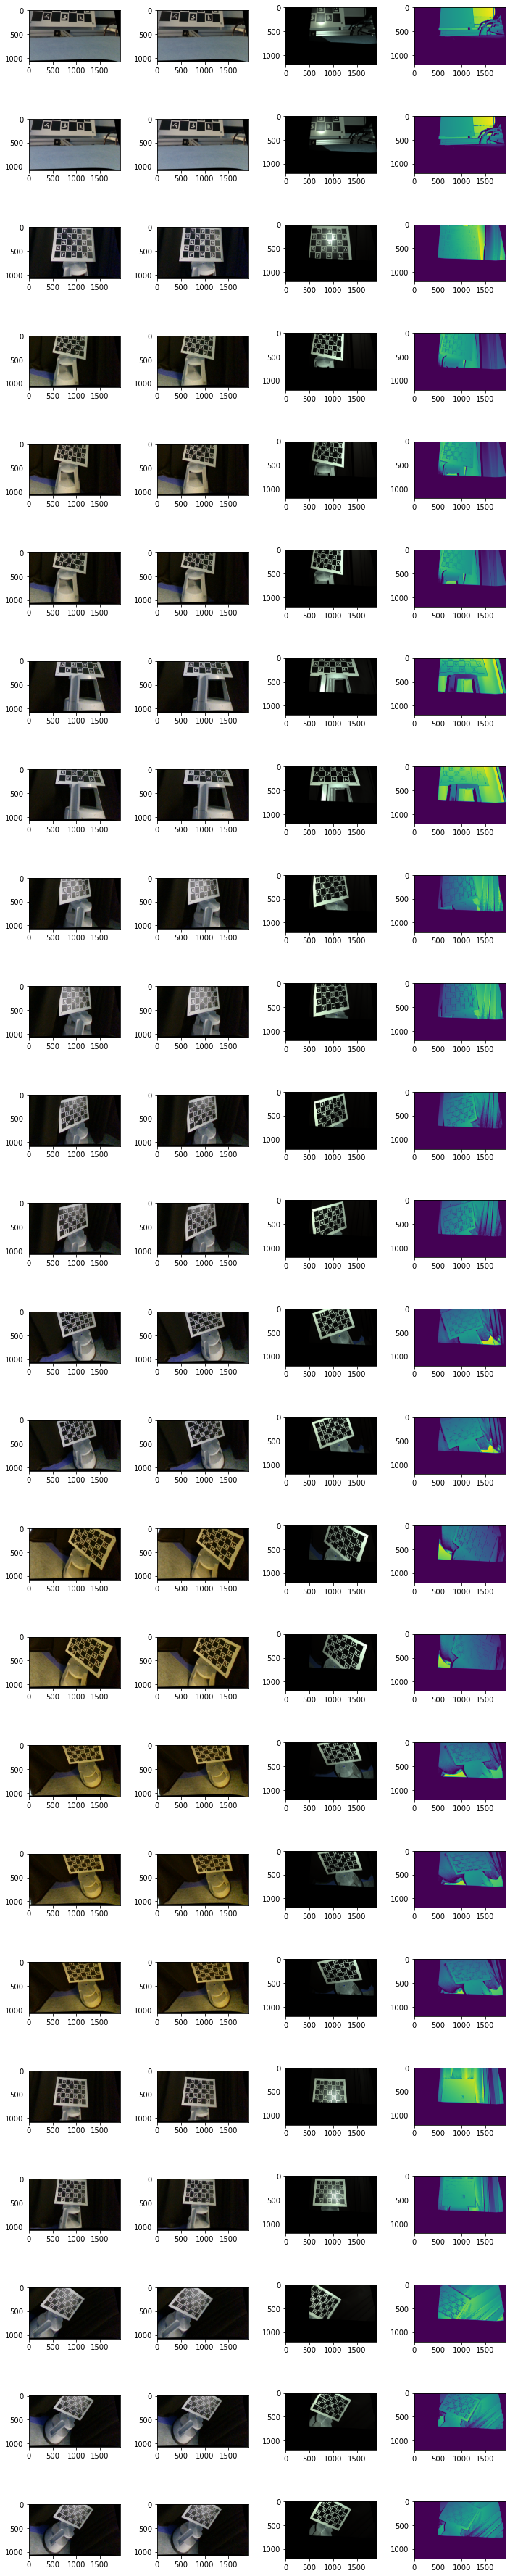

In [4]:
from models.dataset.dataset_interface import open_dataset_images
from matplotlib import pyplot as plt

dataset_file = "../../resources/images/calibrated/dataset_1.npz"

realsense_color, realsense_depth, zivid_color, zivid_depth = open_dataset_images(dataset_file)

plt.figure()
f, axarr = plt.subplots(len(realsense_color), 4, figsize=(10, 50), gridspec_kw={'width_ratios': [1, 1, 1, 1]})
f.tight_layout()

for i in range(len(realsense_color)):
    axarr[i][0].imshow(realsense_color[i])
    axarr[i][1].imshow(realsense_depth[i])
    axarr[i][2].imshow(zivid_color[i])
    axarr[i][3].imshow(zivid_depth[i])